In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk')

In [2]:
def read_exp_res(exp_name):
    control_val = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
    utility_val = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
    control_test = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
    utility_test = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
    similarity_test = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
    return control_val, utility_val, control_test, utility_test, similarity_test

In [3]:
def show_exp_res_tables(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    display("Ctrl Val", df1, "Ctrl Test", df3, "Utility Val", df2, "Utility Test", df4, "Sim Test", df5)

    df_acc = df4[['eps', utility_metric]]
    display("Test " + utility_metric, df_acc)

    df_loss = df5[df5['metric'] == privacy_loss_metric]
    display("All " + privacy_loss_metric, df_loss)

    df_loss_metric = df_loss[['eps', 'mean_all']]
    display("Mean " + privacy_loss_metric, df_loss_metric) 

In [4]:
def plot_exp_res(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    df_u = df4[['eps', utility_metric]]
    df_loss = df5[df5['metric'] == privacy_loss_metric]
    df_loss_metric = df_loss[['eps', 'mean_all']]
    
    x_u = df_u['eps']
    x_l = df_loss_metric['eps']
    y_u = df_u[utility_metric]
    y_l = df_loss_metric['mean_all']
    no_dp_legend = []

    if x_u[0] == "no_dp":
        x_u = x_u[1:]
        x_l = x_l[1:]
        x_u = np.array(x_u, dtype=float)
        x_l = np.array(x_l, dtype=float)
        plt.hlines(y_u[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        plt.hlines(y_l[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        no_dp_legend = [exp_name + "_gen_no_dp_" + utility_metric, exp_name + "_gen_no_dp_" + privacy_loss_metric]
        y_u = y_u[1:]
        y_l = y_l[1:]
    
    x_u = np.array(x_u, dtype=float)
    x_l = np.array(x_l, dtype=float)


    plt.plot(x_u, y_u, color=next(cycol))
    plt.plot(x_l, y_l, color=next(cycol))
    plt.xlabel("eps")
    plt.savefig(str(exp_name) + "_" + str(utility_metric) + "_" + str(exp_name) + "_" + str(privacy_loss_metric) + " _ " + str(no_dp_legend))
    return [exp_name + "_" + utility_metric, exp_name + "_" + privacy_loss_metric] + no_dp_legend



In [5]:
def process_res(exp_name, show_tables=False, utility_metric="acc", privacy_loss_metric = "hamming"):
    tables = read_exp_res(exp_name)
    if show_tables:
        show_exp_res_tables(exp_name, *tables, utility_metric, privacy_loss_metric)
    legend = plot_exp_res(exp_name, *tables, utility_metric, privacy_loss_metric)
    return legend

'deeplog2_a3'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624731e+09,-32.199222,511,329,26,814,0.78869


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624731e+09,-32.199222,730,470,42,1158,0.786667


'Utility Val'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.624731e+09,0,0.05,-67.500943,516,324,237,603,0.666071
1,1.624731e+09,1,0.50,-69.302980,513,327,253,587,0.654762
2,1.624732e+09,2,1.00,-68.008532,520,320,239,601,0.667262
3,1.624732e+09,3,10.00,-79.861327,242,598,75,765,0.599405
4,1.624732e+09,4,50.00,-91.970515,314,526,46,794,0.659524
5,1.624732e+09,5,100.00,-100.315896,314,526,36,804,0.665476


'Utility Test'

,date,iter,eps,threshold,tn,fp,fn,tp,acc
0,1.624731e+09,0,0.05,-67.500943,729,471,329,871,0.666667
1,1.624731e+09,1,0.50,-69.302980,718,482,344,856,0.655833
2,1.624732e+09,2,1.00,-68.008532,722,478,328,872,0.664167
3,1.624732e+09,3,10.00,-79.861327,354,846,129,1071,0.593750
4,1.624732e+09,4,50.00,-91.970515,458,742,82,1118,0.656667
5,1.624732e+09,5,100.00,-100.315896,464,736,55,1145,0.670417


'Sim Test'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.624731e+09,0,0.05,hamming,0.914772,0.836548,0.875660
1,1.624731e+09,0,0.05,hamming_wise,18.758333,16.125833,17.442083
2,1.624731e+09,0,0.05,cosine,0.200787,0.167896,0.184341
3,1.624731e+09,1,0.50,hamming,0.910960,0.836399,0.873680
4,1.624731e+09,1,0.50,hamming_wise,18.679167,16.113333,17.396250
5,1.624731e+09,1,0.50,cosine,0.200768,0.166865,0.183817
6,1.624732e+09,2,1.00,hamming,0.910214,0.831210,0.870712
7,1.624732e+09,2,1.00,hamming_wise,18.656667,16.045000,17.350833
8,1.624732e+09,2,1.00,cosine,0.196466,0.165641,0.181054
9,1.624732e+09,3,10.00,hamming,0.786348,0.707180,0.746764


'Test acc'

,eps,acc
0,0.05,0.666667
1,0.50,0.655833
2,1.00,0.664167
3,10.00,0.593750
4,50.00,0.656667
5,100.00,0.670417


'All hamming'

,date,iter,eps,metric,mean_normal,mean_abnormal,mean_all
0,1.624731e+09,0,0.05,hamming,0.914772,0.836548,0.875660
3,1.624731e+09,1,0.50,hamming,0.910960,0.836399,0.873680
6,1.624732e+09,2,1.00,hamming,0.910214,0.831210,0.870712
9,1.624732e+09,3,10.00,hamming,0.786348,0.707180,0.746764
12,1.624732e+09,4,50.00,hamming,0.363639,0.269864,0.316752
15,1.624732e+09,5,100.00,hamming,0.178462,0.109332,0.143897


'Mean hamming'

,eps,mean_all
0,0.05,0.875660
3,0.50,0.873680
6,1.00,0.870712
9,10.00,0.746764
12,50.00,0.316752
15,100.00,0.143897


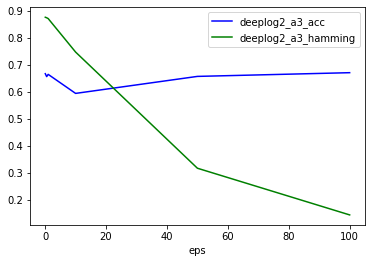

In [6]:
exps = ['deeplog2_a3']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_b3_1'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624732e+09,-33.760733,628,212,40,800,0.85


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624732e+09,-33.760733,900,300,50,1150,0.854167


'Utility Val'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624733e+09,0,no_dp,0,-66.847949,306,534,58,782,0.647619
1,1.624733e+09,1,0.05,1,-66.449974,313,527,42,798,0.661310
2,1.624733e+09,2,0.5,1,-66.331453,315,525,43,797,0.661905
3,1.624734e+09,3,1,1,-66.831277,303,537,52,788,0.649405
4,1.624734e+09,4,10,1,-52.906499,100,740,68,772,0.519048
5,1.624734e+09,5,50,1,-18.264338,776,64,352,488,0.752381
6,1.624734e+09,6,100,1,-16.908173,812,28,370,470,0.763095


'Utility Test'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624733e+09,0,no_dp,0,-66.847949,419,781,74,1126,0.643750
1,1.624733e+09,1,0.05,1,-66.449974,430,770,56,1144,0.655833
2,1.624733e+09,2,0.5,1,-66.331453,430,770,50,1150,0.658333
3,1.624734e+09,3,1,1,-66.831277,406,794,80,1120,0.635833
4,1.624734e+09,4,10,1,-52.906499,118,1082,115,1085,0.501250
5,1.624734e+09,5,50,1,-18.264338,1079,121,442,758,0.765417
6,1.624734e+09,6,100,1,-16.908173,1166,34,476,724,0.787500


'Sim Test'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624733e+09,0,no_dp,0,hamming,0.883631,0.765979,0.824805
1,1.624733e+09,0,no_dp,0,hamming_wise,16.451667,8.562500,12.507083
2,1.624733e+09,0,no_dp,0,cosine,0.182406,0.138815,0.160610
3,1.624733e+09,1,0.05,1,hamming,0.911190,0.773801,0.842496
4,1.624733e+09,1,0.05,1,hamming_wise,17.005000,8.765833,12.885417
5,1.624733e+09,1,0.05,1,cosine,0.187498,0.140384,0.163941
6,1.624733e+09,2,0.5,1,hamming,0.907440,0.774641,0.841041
7,1.624733e+09,2,0.5,1,hamming_wise,16.932500,8.744167,12.838333
8,1.624733e+09,2,0.5,1,cosine,0.183803,0.137069,0.160436
9,1.624734e+09,3,1,1,hamming,0.901048,0.772080,0.836564


'Test acc'

,eps,acc
0,no_dp,0.643750
1,0.05,0.655833
2,0.5,0.658333
3,1,0.635833
4,10,0.501250
5,50,0.765417
6,100,0.787500


'All hamming'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624733e+09,0,no_dp,0,hamming,0.883631,0.765979,0.824805
3,1.624733e+09,1,0.05,1,hamming,0.911190,0.773801,0.842496
6,1.624733e+09,2,0.5,1,hamming,0.907440,0.774641,0.841041
9,1.624734e+09,3,1,1,hamming,0.901048,0.772080,0.836564
12,1.624734e+09,4,10,1,hamming,0.508982,0.609990,0.559486
15,1.624734e+09,5,50,1,hamming,0.331659,0.532289,0.431974
18,1.624734e+09,6,100,1,hamming,0.332875,0.525565,0.429220


'Mean hamming'

,eps,mean_all
0,no_dp,0.824805
3,0.05,0.842496
6,0.5,0.841041
9,1,0.836564
12,10,0.559486
15,50,0.431974
18,100,0.429220


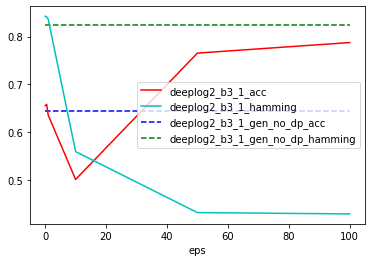

In [15]:
exps = ['deeplog2_b3']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_c3'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624734e+09,-25.062949,735,105,155,685,0.845238


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624734e+09,-25.062949,1069,131,218,982,0.854583


'Utility Val'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624735e+09,0,no_dp,0,-5.715640,840,0,129,711,0.923214
1,1.624736e+09,1,0.05,1,-5.213091,809,31,784,56,0.514881
2,1.624736e+09,2,0.5,1,-14.024178,691,149,575,265,0.569048
3,1.624736e+09,3,1,1,-4.744737,817,23,738,102,0.547024
4,1.624737e+09,4,10,1,-53.506510,4,836,1,839,0.501786
5,1.624748e+09,5,50,1,-45.266389,6,834,3,837,0.501786
6,1.624749e+09,6,100,1,-26.122033,31,809,26,814,0.502976


'Utility Test'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624736e+09,0,no_dp,0,-5.715640,1200,0,181,1019,0.924583
1,1.624736e+09,1,0.05,1,-5.213091,1155,45,1129,71,0.510833
2,1.624736e+09,2,0.5,1,-14.024178,998,202,856,344,0.559167
3,1.624736e+09,3,1,1,-4.744737,1170,30,1004,196,0.569167
4,1.624737e+09,4,10,1,-53.506510,4,1196,9,1191,0.497917
5,1.624749e+09,5,50,1,-45.266389,7,1193,8,1192,0.499583
6,1.624749e+09,6,100,1,-26.122033,36,1164,49,1151,0.494583


'Sim Test'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624736e+09,0,no_dp,0,hamming,0.251054,0.277027,0.264040
1,1.624736e+09,0,no_dp,0,hamming_wise,4.050833,2.614167,3.332500
2,1.624736e+09,0,no_dp,0,cosine,0.055486,0.083464,0.069475
3,1.624736e+09,1,0.05,1,hamming,0.853615,0.681464,0.767539
4,1.624736e+09,1,0.05,1,hamming_wise,15.958333,8.162500,12.060417
5,1.624736e+09,1,0.05,1,cosine,0.175650,0.130306,0.152978
6,1.624736e+09,2,0.5,1,hamming,0.862526,0.690115,0.776321
7,1.624736e+09,2,0.5,1,hamming_wise,16.125833,8.252500,12.189167
8,1.624736e+09,2,0.5,1,cosine,0.233953,0.162292,0.198122
9,1.624736e+09,3,1,1,hamming,0.867071,0.688194,0.777633


'Test acc'

,eps,acc
0,no_dp,0.924583
1,0.05,0.510833
2,0.5,0.559167
3,1,0.569167
4,10,0.497917
5,50,0.499583
6,100,0.494583


'All hamming'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624736e+09,0,no_dp,0,hamming,0.251054,0.277027,0.264040
3,1.624736e+09,1,0.05,1,hamming,0.853615,0.681464,0.767539
6,1.624736e+09,2,0.5,1,hamming,0.862526,0.690115,0.776321
9,1.624736e+09,3,1,1,hamming,0.867071,0.688194,0.777633
12,1.624737e+09,4,10,1,hamming,0.761609,0.546890,0.654249
15,1.624749e+09,5,50,1,hamming,0.538339,0.380353,0.459346
18,1.624749e+09,6,100,1,hamming,0.459770,0.343454,0.401612


'Mean hamming'

,eps,mean_all
0,no_dp,0.264040
3,0.05,0.767539
6,0.5,0.776321
9,1,0.777633
12,10,0.654249
15,50,0.459346
18,100,0.401612


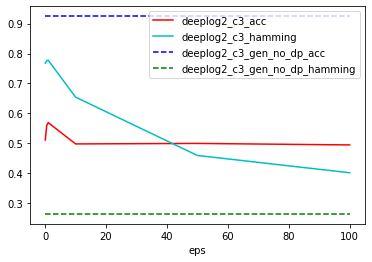

In [8]:
exps = ['deeplog2_c3']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_d3'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624749e+09,-22.375542,840,0,104,736,0.938095


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624749e+09,-22.375542,1200,0,152,1048,0.936667


'Utility Val'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624750e+09,0,no_dp,0,-5.698335,839,1,68,772,0.958929
1,1.624750e+09,1,0.05,1,-66.170454,314,526,42,798,0.661905
2,1.624750e+09,2,0.5,1,-66.773833,305,535,49,791,0.652381
3,1.624750e+09,3,1,1,-66.488913,315,525,44,796,0.661310
4,1.624750e+09,4,10,1,-66.512849,312,528,42,798,0.660714
5,1.624750e+09,5,50,1,-66.078914,126,714,56,784,0.541667
6,1.624751e+09,6,100,1,-51.453324,101,739,85,755,0.509524


'Utility Test'

,date,iter,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624750e+09,0,no_dp,0,-5.698335,1200,0,86,1114,0.964167
1,1.624750e+09,1,0.05,1,-66.170454,429,771,54,1146,0.656250
2,1.624750e+09,2,0.5,1,-66.773833,415,785,57,1143,0.649167
3,1.624750e+09,3,1,1,-66.488913,430,770,60,1140,0.654167
4,1.624750e+09,4,10,1,-66.512849,426,774,55,1145,0.654583
5,1.624751e+09,5,50,1,-66.078914,163,1037,94,1106,0.528750
6,1.624751e+09,6,100,1,-51.453324,121,1079,126,1074,0.497917


'Sim Test'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624750e+09,0,no_dp,0,hamming,0.314276,0.383012,0.348644
1,1.624750e+09,0,no_dp,0,hamming_wise,5.312500,3.161667,4.237083
2,1.624750e+09,0,no_dp,0,cosine,0.061425,0.099861,0.080643
3,1.624750e+09,1,0.05,1,hamming,0.913944,0.779898,0.846921
4,1.624750e+09,1,0.05,1,hamming_wise,17.056667,8.811667,12.934167
5,1.624750e+09,1,0.05,1,cosine,0.188595,0.138165,0.163380
6,1.624750e+09,2,0.5,1,hamming,0.910657,0.777088,0.843872
7,1.624750e+09,2,0.5,1,hamming_wise,16.987500,8.801667,12.894583
8,1.624750e+09,2,0.5,1,cosine,0.186668,0.139282,0.162975
9,1.624750e+09,3,1,1,hamming,0.910863,0.775604,0.843234


'Test acc'

,eps,acc
0,no_dp,0.964167
1,0.05,0.656250
2,0.5,0.649167
3,1,0.654167
4,10,0.654583
5,50,0.528750
6,100,0.497917


'All hamming'

,date,iter,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624750e+09,0,no_dp,0,hamming,0.314276,0.383012,0.348644
3,1.624750e+09,1,0.05,1,hamming,0.913944,0.779898,0.846921
6,1.624750e+09,2,0.5,1,hamming,0.910657,0.777088,0.843872
9,1.624750e+09,3,1,1,hamming,0.910863,0.775604,0.843234
12,1.624750e+09,4,10,1,hamming,0.901742,0.774935,0.838339
15,1.624751e+09,5,50,1,hamming,0.763528,0.712700,0.738114
18,1.624751e+09,6,100,1,hamming,0.527528,0.614705,0.571116


'Mean hamming'

,eps,mean_all
0,no_dp,0.348644
3,0.05,0.846921
6,0.5,0.843872
9,1,0.843234
12,10,0.838339
15,50,0.738114
18,100,0.571116


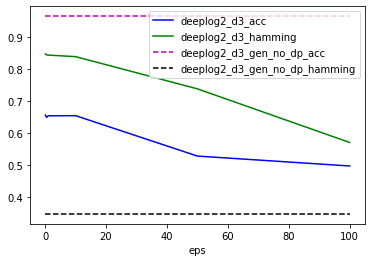

In [9]:
exps = ['deeplog2_d3']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()

'deeplog2_e3'

'Ctrl Val'

,date,threshold,tn,fp,fn,tp,acc
0,1.624715e+09,-38.673927,628,212,50,790,0.844048


'Ctrl Test'

,date,threshold,tn,fp,fn,tp,acc
0,1.624716e+09,-38.673927,902,298,77,1123,0.84375


'Utility Val'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624716e+09,no_dp,0,-3.679918,814,26,42,798,0.959524
1,1.624716e+09,0.05,1,-10.871905,696,144,611,229,0.550595
2,1.624716e+09,0.5,1,-4.652030,791,49,771,69,0.511905
3,1.624717e+09,1,1,-4.262608,814,26,807,33,0.504167
4,1.624717e+09,10,1,-6.078415,804,36,751,89,0.531548
5,1.624717e+09,50,1,-8.161938,756,84,348,492,0.742857
6,1.624718e+09,100,1,-10.407391,813,27,134,706,0.904167


'Utility Test'

,date,eps,maxdelta,threshold,tn,fp,fn,tp,acc
0,1.624716e+09,no_dp,0,-3.679918,1168,32,51,1149,0.965417
1,1.624716e+09,0.05,1,-10.871905,968,232,873,327,0.539583
2,1.624716e+09,0.5,1,-4.652030,1116,84,1085,115,0.512917
3,1.624717e+09,1,1,-4.262608,1158,42,1152,48,0.502500
4,1.624717e+09,10,1,-6.078415,1152,48,1096,104,0.523333
5,1.624718e+09,50,1,-8.161938,1092,108,498,702,0.747500
6,1.624718e+09,100,1,-10.407391,1165,35,177,1023,0.911667


'Sim Test'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624716e+09,no_dp,0,hamming,0.945105,0.804403,0.874754
1,1.624716e+09,no_dp,0,hamming_wise,17.638333,9.116667,13.377500
2,1.624716e+09,no_dp,0,cosine,0.094751,0.086606,0.090679
3,1.624716e+09,0.05,1,hamming,0.913179,0.779245,0.846212
4,1.624716e+09,0.05,1,hamming_wise,17.039167,8.839167,12.939167
5,1.624716e+09,0.05,1,cosine,0.154863,0.119649,0.137256
6,1.624716e+09,0.5,1,hamming,0.912286,0.779980,0.846133
7,1.624716e+09,0.5,1,hamming_wise,17.025000,8.824167,12.924583
8,1.624716e+09,0.5,1,cosine,0.153863,0.118817,0.136340
9,1.624717e+09,1,1,hamming,0.913240,0.777421,0.845331


'Test acc'

,eps,acc
0,no_dp,0.965417
1,0.05,0.539583
2,0.5,0.512917
3,1,0.502500
4,10,0.523333
5,50,0.747500
6,100,0.911667


'All hamming'

,date,eps,maxdelta,metric,mean_normal,mean_abnormal,mean_all
0,1.624716e+09,no_dp,0,hamming,0.945105,0.804403,0.874754
3,1.624716e+09,0.05,1,hamming,0.913179,0.779245,0.846212
6,1.624716e+09,0.5,1,hamming,0.912286,0.779980,0.846133
9,1.624717e+09,1,1,hamming,0.913240,0.777421,0.845331
12,1.624717e+09,10,1,hamming,0.912079,0.782434,0.847256
15,1.624718e+09,50,1,hamming,0.930177,0.797968,0.864072
18,1.624718e+09,100,1,hamming,0.943700,0.804265,0.873983


'Mean hamming'

,eps,mean_all
0,no_dp,0.874754
3,0.05,0.846212
6,0.5,0.846133
9,1,0.845331
12,10,0.847256
15,50,0.864072
18,100,0.873983


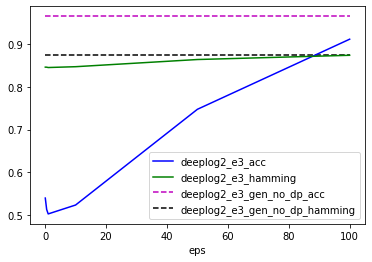

In [16]:
exps = ['deeplog2_e3']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()